In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data / 16.0  
y = digits.target

mlp = MLPClassifier(hidden_layer_sizes=(12,), activation='relu', 
                    solver='adam', max_iter=2000, random_state=42)
mlp.fit(X, y)

print(f"Training Complete! Accuracy: {mlp.score(X, y)*100:.2f}%\n")

def to_cpp(array, name, is_bias=False):
    if is_bias:
        content = ", ".join([f"{v:.4f}f" for v in array])
        return f"const float {name}[{len(array)}] PROGMEM = {{{content}}};"
    else:
        rows = []
        for row in array:
            rows.append("{" + ", ".join([f"{v:.4f}f" for v in row]) + "}")
        content = ",\n  ".join(rows)
        return f"const float {name}[{array.shape[0]}][{array.shape[1]}] PROGMEM = {{\n  {content}\n}};"

print(to_cpp(mlp.coefs_[0], "layer0_weights"))
print(to_cpp(mlp.intercepts_[0], "layer0_biases", True))
print(to_cpp(mlp.coefs_[1], "layer1_weights"))
print(to_cpp(mlp.intercepts_[1], "layer1_biases", True))

Training Complete! Accuracy: 99.89%

const float layer0_weights[64][12] PROGMEM = {
  {0.0000f, 0.0000f, 0.0000f, 0.0000f, -0.0000f, -0.0000f, -0.0000f, 0.0000f, 0.0000f, -0.0000f, -0.0000f, 0.0000f},
  {-0.9163f, 0.6811f, 1.9082f, 0.5451f, -0.6595f, -1.3552f, 0.7525f, 0.6115f, -0.8501f, 0.2940f, -1.8651f, 0.1352f},
  {-0.4026f, 0.9490f, 0.9240f, -0.5244f, 0.7669f, -0.6840f, -0.2636f, 0.2266f, 0.6721f, -0.4397f, 0.0589f, 0.0966f},
  {0.8121f, 0.5682f, -0.2472f, -0.2625f, -0.1109f, -0.4465f, 0.3405f, 0.0426f, 0.1953f, 0.6464f, 0.3129f, 0.9123f},
  {0.8498f, 0.5730f, 0.0912f, -0.3491f, 0.8889f, -0.2887f, 0.7404f, -0.0732f, -0.3350f, 1.1265f, -1.0428f, 0.2844f},
  {0.2741f, 1.0233f, 0.7150f, -0.0172f, -0.7820f, -0.5524f, 0.1325f, 0.9826f, 0.1283f, -0.3329f, 0.2381f, -0.0005f},
  {-0.1264f, 1.4979f, 1.1478f, -0.2398f, -0.5979f, -1.8287f, 0.2644f, -0.5820f, -1.2250f, -0.5583f, 0.1391f, -0.5396f},
  {-0.2106f, -0.6847f, 0.0742f, -0.2142f, 0.2688f, 0.3091f, 0.2944f, -0.4754f, -0.6239f, 0.3101

Index: 1322
True Label: 5
Model Prediction: 5
Success! Predicteed Right


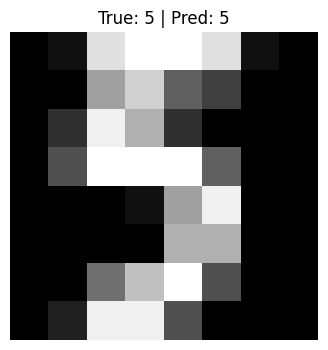

0,1,14,16,16,14,1,0,0,0,10,13,6,4,0,0,0,3,15,11,3,0,0,0,0,5,16,16,16,6,0,0,

0,0,0,1,10,15,0,0,0,0,0,0,11,11,0,0,0,0,7,12,16,5,0,0,0,2,15,15,5,0,0,0,



In [27]:
test_index = np.random.randint(0, len(X))
sample_digit = X[test_index]
true_label = y[test_index]

prediction = mlp.predict(sample_digit.reshape(1, -1))

print(f"Index: {test_index}")
print(f"True Label: {true_label}")
print(f"Model Prediction: {prediction[0]}")

if prediction[0] == true_label:
    print("Success! Predicteed Right")
else:
    print("Oops! Wrongly Predicted")

plt.figure(figsize=(4,4))
plt.imshow(digits.images[test_index], cmap='gray')
plt.title(f"True: {true_label} | Pred: {prediction[0]}")
plt.axis('off')
plt.show()

raw_pixels = (sample_digit * 16).astype(int)

for i in range(0, 64, 32):
    chunk = raw_pixels[i:i+32]
    chunk_str = ",".join(map(str, chunk)) + ","
    print(chunk_str)
    print()
